### PCRP 1017-Auto Price Prediction.

Objective:To predict the price of the automobiles using the variables or features given in the dataset using ML models that best predict the price.

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset using Pandas

In [2]:
missing_values=["?"]
df=pd.read_csv('auto_imports.csv',na_values=missing_values)
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            200 non-null    int64  
 1   ?            164 non-null    float64
 2   alfa-romero  200 non-null    object 
 3   gas          200 non-null    object 
 4   std          200 non-null    object 
 5   two          198 non-null    object 
 6   convertible  200 non-null    object 
 7   rwd          200 non-null    object 
 8   front        200 non-null    object 
 9   88.60        200 non-null    float64
 10  168.80       200 non-null    float64
 11  64.10        200 non-null    float64
 12  48.80        200 non-null    float64
 13  2548         200 non-null    int64  
 14  dohc         200 non-null    object 
 15  four         200 non-null    object 
 16  130          200 non-null    int64  
 17  mpfi         200 non-null    object 
 18  3.47         196 non-null    float64
 19  2.68    

In [4]:
df.shape

(200, 26)

#### Cleaning the data

In [5]:
df.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [6]:
df.rename(columns={'3':'Symboling', '?':'Normalized_losses', 'alfa-romero':'Make', 'gas':'Fuel_type', 'std':'Aspiration', 'two':'Num_of_doors', 'convertible':'Body-style', 'rwd':'Drive_wheels',
       'front':'Engine_location', '88.60':'Wheel_base', '168.80':'Length', '64.10':'Width', '48.80':'Height', '2548':'Curb_weight', 'dohc':'Engine_type', 'four':'Num_of_cylinders',
       '130':'Engine_size', 'mpfi':'Fuel_system', '3.47':'Bore', '2.68':'Stroke', '9.00':'Compression_ratio', '111':'Horsepower', '5000':'Peak_rpm', '21':'City_mpg', '27':'Highway_mpg',
       '13495':'Price'}, inplace=True)  
df.head()
#df.shape

,Symboling,Normalized_losses,Make,Fuel_type,Aspiration,Num_of_doors,Body-style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [7]:
df.columns

Index(['Symboling', 'Normalized_losses', 'Make', 'Fuel_type', 'Aspiration',
       'Num_of_doors', 'Body-style', 'Drive_wheels', 'Engine_location',
       'Wheel_base', 'Length', 'Width', 'Height', 'Curb_weight', 'Engine_type',
       'Num_of_cylinders', 'Engine_size', 'Fuel_system', 'Bore', 'Stroke',
       'Compression_ratio', 'Horsepower', 'Peak_rpm', 'City_mpg',
       'Highway_mpg', 'Price'],
      dtype='object')

In [8]:
df.reset_index()

,index,Symboling,Normalized_losses,Make,Fuel_type,Aspiration,Num_of_doors,Body-style,Drive_wheels,Engine_location,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,3,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,4,2,NaN,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
196,196,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
197,197,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
198,198,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


#### Identifying the null values

In [9]:
nan=df.isnull().sum()
nan[nan>0]

Normalized_losses    36
Num_of_doors          2
Bore                  4
Stroke                4
Horsepower            2
Peak_rpm              2
dtype: int64

#### Handling missing values

In [10]:
df['Normalized_losses']. fillna(df['Normalized_losses'].mean(), inplace=True)
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)
df['Bore'].fillna(df['Bore'].mean(), inplace=True)
df['Peak_rpm'].fillna(df['Peak_rpm'].mean(), inplace=True)
df['Stroke'].fillna(df['Stroke'].mean(),inplace=True)

In [11]:
df['Num_of_doors'].value_counts().idxmax()
#df.dropna(subset=['Stroke'],axis=0, inplace=True)

'four'

In [12]:
df['Num_of_doors'].replace(np.nan, "four", inplace=True)

In [13]:
df.isnull().sum()

Symboling            0
Normalized_losses    0
Make                 0
Fuel_type            0
Aspiration           0
Num_of_doors         0
Body-style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Num_of_cylinders     0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
Price                0
dtype: int64

#### Exploratory Data Analysis

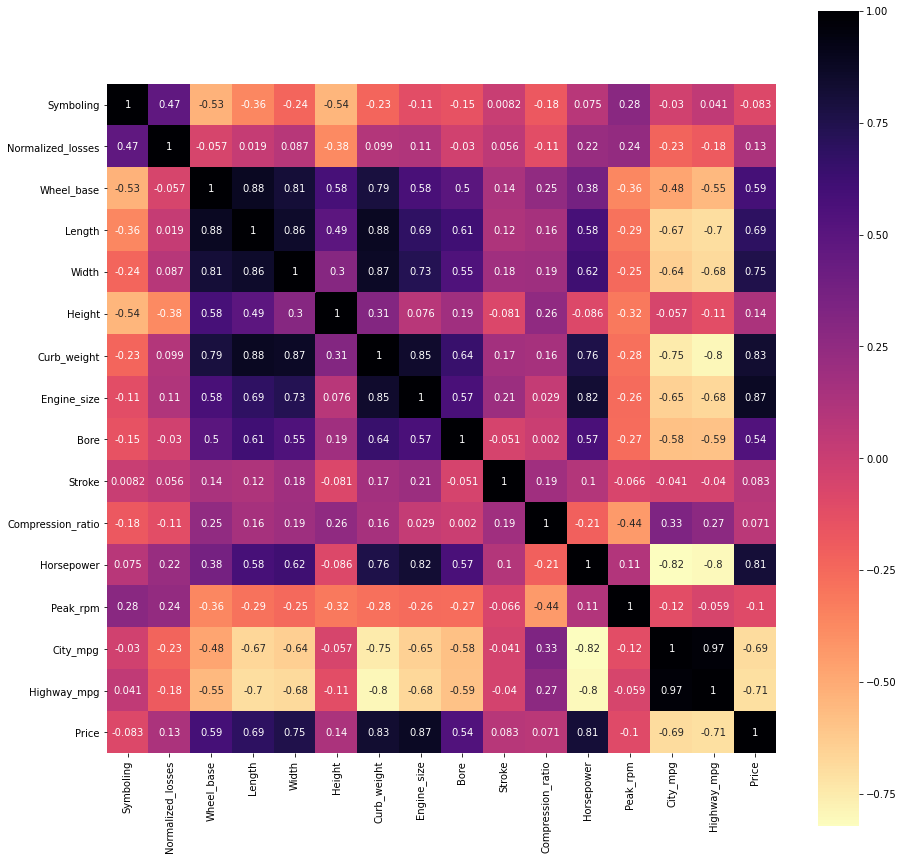

In [14]:
fig,ax=plt.subplots(figsize=[15,15])
cor=df.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
sns_plot = sns.heatmap(cor,annot =True,cmap='magma_r',square=True)
fig = sns_plot.get_figure()
fig.savefig("1017corrHeatmap.png")

#### Visualising the positively correlated and negatively corelated features with target variable

In [15]:
#closely correlated features with price
pvecorr_price=df[{'Wheel_base','Length','Width','Curb_weight','Engine_size','Bore','Horsepower'}]
nvecorr_price=df[{'Symboling','Peak_rpm','City_mpg','Highway_mpg'}]

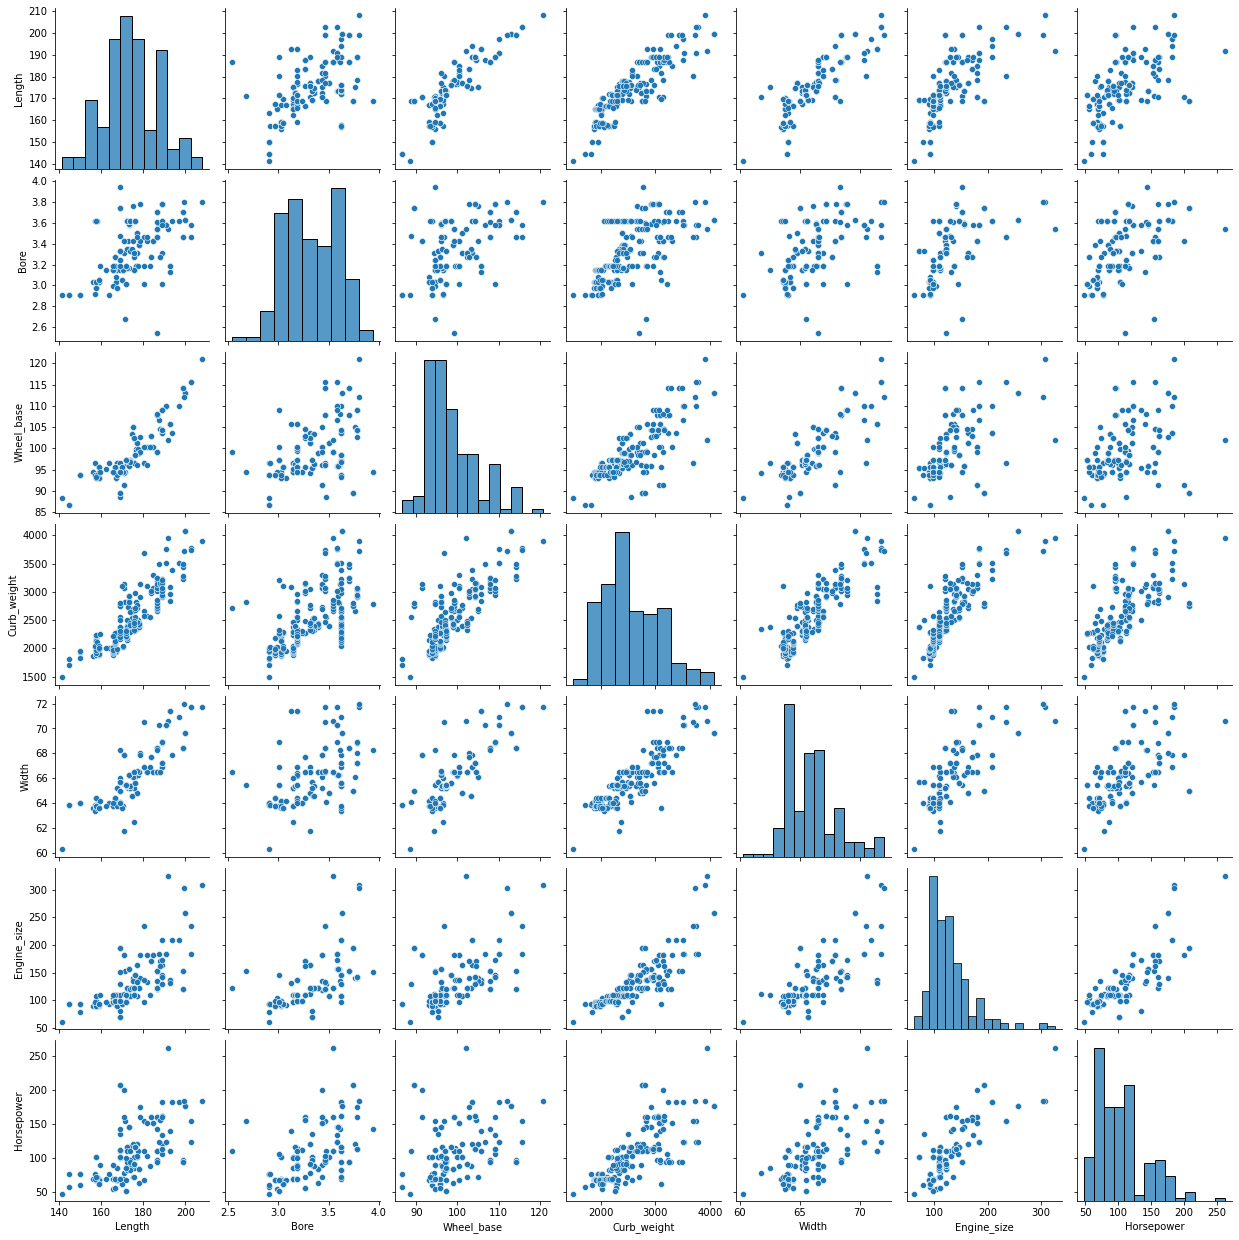

In [16]:
sns.pairplot(pvecorr_price)

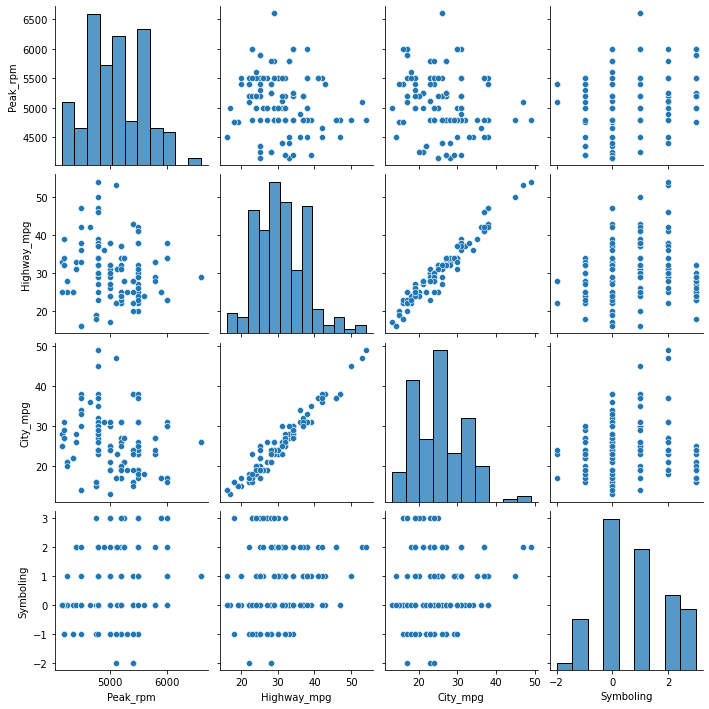

In [17]:
sns.pairplot(nvecorr_price)

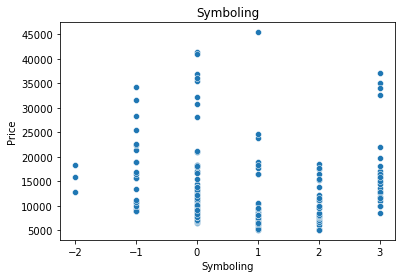

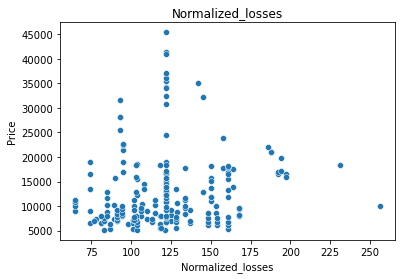

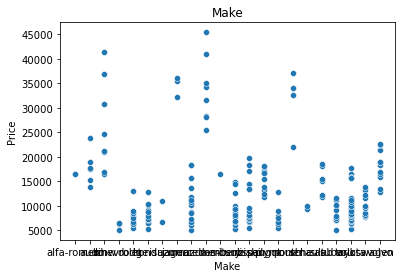

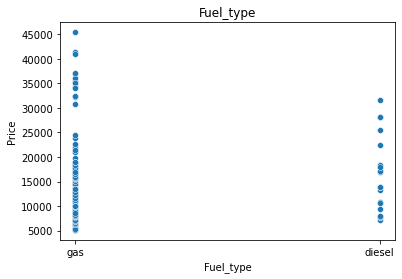

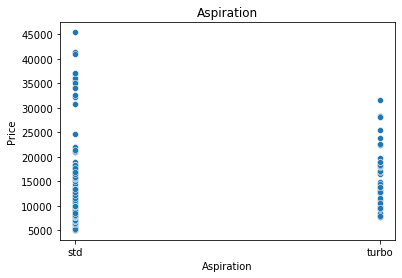

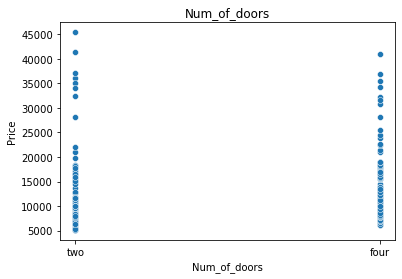

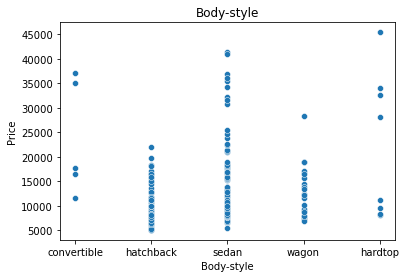

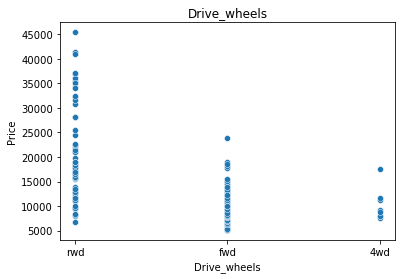

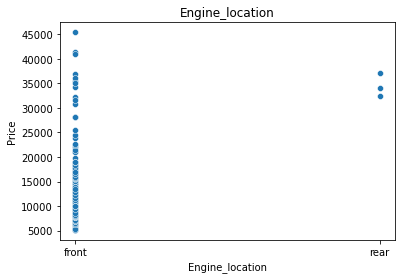

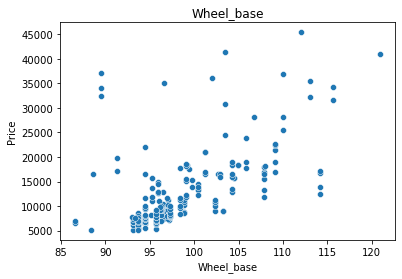

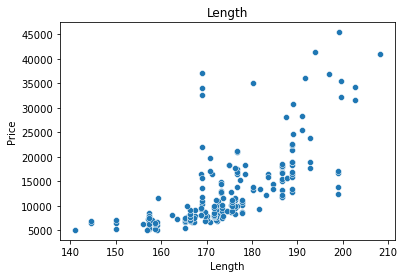

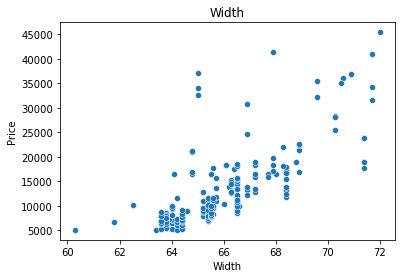

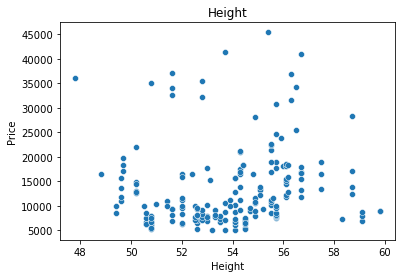

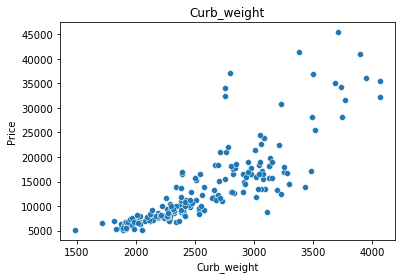

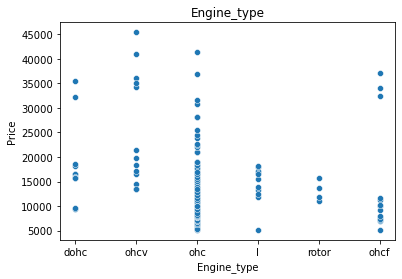

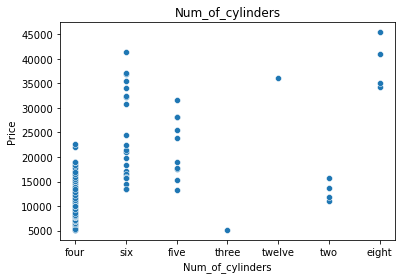

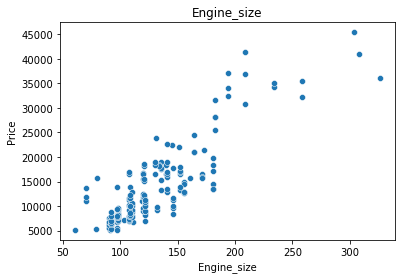

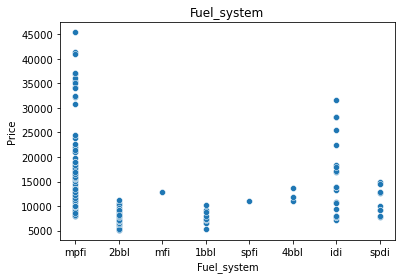

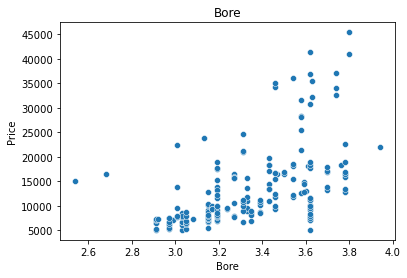

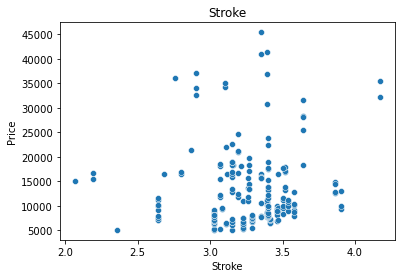

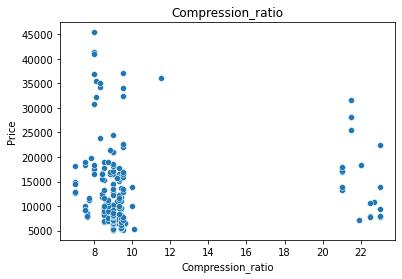

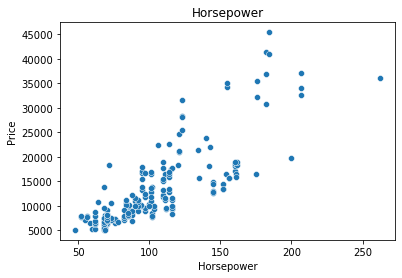

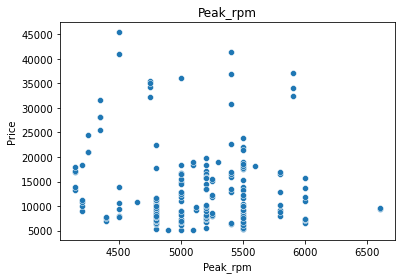

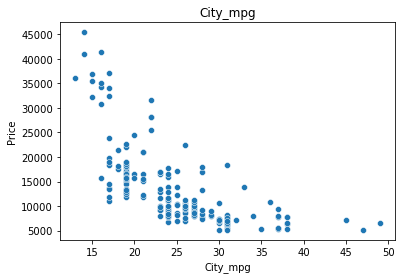

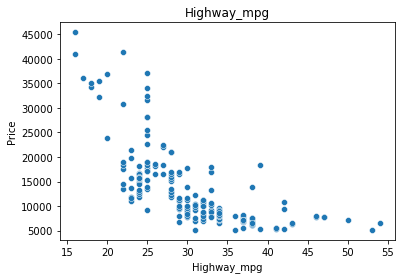

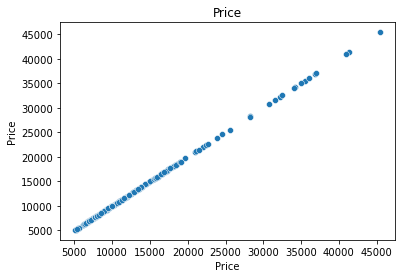

In [18]:
for i in df.columns:
    plt.title(i)
    sns.scatterplot(df[i],df['Price'])
    plt.show()

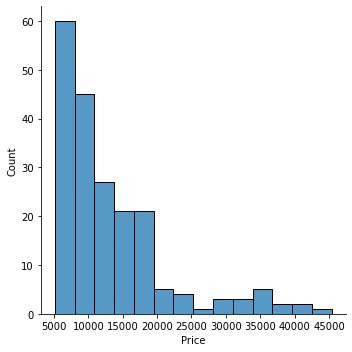

In [19]:
sns.displot(df['Price'])

#### Feature Engineering
by using Filter method features are selected which have strong correlation with the target variable

In [20]:
#Correlation with output variable
cor_target = abs(cor["Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Wheel_base     0.589147
Length         0.691044
Width          0.752795
Curb_weight    0.834420
Engine_size    0.872337
Bore           0.543431
Horsepower     0.809736
City_mpg       0.687186
Highway_mpg    0.705115
Price          1.000000
Name: Price, dtype: float64

In [21]:
df1=df.copy()
df1.columns

Index(['Symboling', 'Normalized_losses', 'Make', 'Fuel_type', 'Aspiration',
       'Num_of_doors', 'Body-style', 'Drive_wheels', 'Engine_location',
       'Wheel_base', 'Length', 'Width', 'Height', 'Curb_weight', 'Engine_type',
       'Num_of_cylinders', 'Engine_size', 'Fuel_system', 'Bore', 'Stroke',
       'Compression_ratio', 'Horsepower', 'Peak_rpm', 'City_mpg',
       'Highway_mpg', 'Price'],
      dtype='object')

##### Note: Based on the Filter method, the features which have >0.5 correlation with the Target variable are selected and the rest of the   features are dropped
#### Also the Independent features that are closely correlated with each other are dropped

In [22]:
df1.drop({'Symboling', 'Normalized_losses', 'Make', 'Fuel_type', 'Aspiration',
       'Num_of_doors', 'Body-style', 'Drive_wheels', 'Engine_location','Height', 'Length','Wheel_base','Bore','Engine_type',
       'Num_of_cylinders', 'Fuel_system', 'Stroke',
       'Compression_ratio', 'Peak_rpm'}, axis=1,inplace=True)

#### FInal Dataset

In [23]:
df1.head()

,Width,Curb_weight,Engine_size,Horsepower,City_mpg,Highway_mpg,Price
0,64.1,2548,130,111.0,21,27,16500
1,65.5,2823,152,154.0,19,26,16500
2,66.2,2337,109,102.0,24,30,13950
3,66.4,2824,136,115.0,18,22,17450
4,66.3,2507,136,110.0,19,25,15250


#### Train and Test Split

In [24]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]
y

0      16500
1      16500
2      13950
3      17450
4      15250
       ...  
195    16845
196    19045
197    21485
198    22470
199    22625
Name: Price, Length: 200, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=25)
X_train.shape,X_test.shape

((160, 6), (40, 6))

#### Scaling the data

In [27]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

#### Linear Regression model

In [28]:
model=LinearRegression().fit(X_train,y_train)

In [29]:
model_predictions =  model.predict(X)
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

print("coefficients:", model.coef_)
print('*'*60)
print("intercept is:",model.intercept_)
print('*'*60)
print("mean squared error:",mean_squared_error(y_true=y , y_pred=model_predictions))
print("mean absolute error:", mean_absolute_error(y_true=y , y_pred=model_predictions))

print('*'*60)
print("r2 score for training data is:",model.score(X_train,y_train))
print('*'*60)
print("r2 score test data is:",model.score(X_test, y_test))

coefficients: [ 1057.19422361  1782.36930329  2909.67866534  2109.56149057
 -1157.53586254  1330.5041145 ]
************************************************************
intercept is: 13118.893749999997
************************************************************
mean squared error: 28458226603525.61
mean absolute error: 5223636.681982062
************************************************************
r2 score for training data is: 0.8151374466015473
************************************************************
r2 score test data is: 0.8064571942111252


#### XG Boost

In [30]:
from xgboost import XGBRegressor

In [31]:
xgbr = XGBRegressor(n_estimators=100, max_depth=4)

xgbr.fit(X_train, y_train)
y_predict = xgbr.predict(X_test)

msr = mean_squared_error(y_true=y_test, y_pred=y_predict)
mar = mean_absolute_error(y_true=y_test, y_pred=y_predict)
r2_s = r2_score(y_true=y_test, y_pred=y_predict)

print("StandardScaler and XGBRegressor:")
print("Mean Squared Error:", msr)
print("Mean Absolute Error:", mar)
print("R2 Score:", r2_s)

StandardScaler and XGBRegressor:
Mean Squared Error: 3648075.5635104952
Mean Absolute Error: 1398.6410034179687
R2 Score: 0.9475135345461679


In [32]:
from sklearn.model_selection import cross_val_score

model_cvs = cross_val_score(estimator=model, X=X, y=y, cv=10)
xgbr_cvs = cross_val_score(estimator=xgbr, X=X, y=y, cv=10)
print("LinearRegression CrossVal Score:\n",model_cvs)
print("XGBRegression CrossVal Score\n", xgbr_cvs)

LinearRegression CrossVal Score:
 [ 0.65118103  0.18447229  0.80162739  0.74317432 -1.35492175  0.50256853
  0.55627823  0.42525689 -0.78754948  0.72837549]
XGBRegression CrossVal Score
 [ 0.69576945  0.70227392  0.94113768  0.91160431  0.23873157 -0.0163776
  0.71597129 -0.67305415  0.51947002  0.55353658]


### Summary: 

#### The XGboost did a better job at predicting the test data compared to the Linear Regression model by giving a better R2 score.